In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer

from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit

from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import classification_report, precision_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import sklearn
print(sklearn.__version__)

1.0.2


### Область работы 2 (поиск  модели .... )

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

## Анализ данных

Сначала посмотрим на наши данные, попробуем что-нибудь проанализировать и вычудить...
Посмотрим в целом что, да как. Также оценим как меняется среднее значение и стандартное отклонение в зависимости от значения quality (оценка качества нашего вина).

In [3]:
vino_train = pd.read_csv('train.csv')
display(vino_train.info())
display(vino_train.describe().T.style.background_gradient(cmap = 'Reds'))
display(vino_train.groupby('quality').mean())
display(vino_train.groupby('quality').std())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1725 non-null   float64
 1   volatile acidity      1725 non-null   float64
 2   citric acid           1725 non-null   float64
 3   residual sugar        1725 non-null   float64
 4   chlorides             1725 non-null   float64
 5   free sulfur dioxide   1725 non-null   float64
 6   total sulfur dioxide  1725 non-null   float64
 7   density               1725 non-null   float64
 8   pH                    1725 non-null   float64
 9   sulphates             1725 non-null   float64
 10  alcohol               1725 non-null   float64
 11  quality               1725 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.8 KB


None

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1725.000000,6.821797,0.853886,3.900000,6.300000,6.800000,7.300000,11.800000
volatile acidity,1725.000000,0.283849,0.106090,0.085000,0.210000,0.270000,0.330000,1.100000
citric acid,1725.000000,0.332545,0.122279,0.000000,0.270000,0.320000,0.380000,1.660000
residual sugar,1725.000000,5.725652,4.570812,0.600000,1.600000,4.600000,8.700000,20.700000
chlorides,1725.000000,0.044460,0.021236,0.012000,0.034000,0.041000,0.049000,0.290000
free sulfur dioxide,1725.000000,34.615072,16.751535,3.000000,23.000000,33.000000,45.000000,124.000000
total sulfur dioxide,1725.000000,135.248116,42.848854,10.000000,105.000000,130.000000,164.000000,366.500000
density,1725.000000,0.993532,0.002830,0.987110,0.991320,0.993200,0.995500,1.001820
pH,1725.000000,3.201449,0.151395,2.830000,3.100000,3.190000,3.300000,3.820000
sulphates,1725.000000,0.492394,0.121452,0.220000,0.400000,0.480000,0.560000,1.080000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.173333,0.348667,0.348667,7.576667,0.058067,35.866667,152.500000,0.995491,3.116667,0.478667,10.313333
4,7.116522,0.371217,0.305130,4.974783,0.051965,22.091304,123.956522,0.994352,3.171217,0.472000,10.114348
5,6.913605,0.308401,0.332948,6.895465,0.051392,36.456916,151.394558,0.995048,3.167007,0.484399,9.841950
6,6.786287,0.261800,0.339925,6.092444,0.045013,36.231343,138.760261,0.993752,3.206884,0.494123,10.654229
7,6.710756,0.264603,0.328740,4.659302,0.037736,33.986434,122.784884,0.992143,3.225659,0.501395,11.496964
8,6.605102,0.282908,0.337449,4.734184,0.035347,35.591837,120.428571,0.991633,3.243061,0.497551,11.911224
9,7.550000,0.282500,0.397500,4.100000,0.029750,27.500000,115.250000,0.991875,3.315000,0.492500,12.050000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,1.519618,0.148798,0.075863,5.620367,0.053371,37.282927,91.363286,0.002802,0.187108,0.127943,1.202299
4,1.074336,0.170484,0.165478,4.393797,0.029769,17.203705,52.694650,0.002507,0.166624,0.121851,1.042512
5,0.856285,0.102437,0.148354,4.999765,0.023885,18.121288,45.510509,0.002428,0.133466,0.099598,0.815691
6,0.806460,0.089815,0.125271,4.787832,0.021745,15.897323,42.512075,0.002796,0.147913,0.119190,1.142675
7,0.758720,0.090565,0.082308,3.752135,0.010991,14.159761,32.028526,0.002484,0.156533,0.133485,1.165944
8,0.835226,0.099314,0.092840,3.688800,0.008700,16.417138,28.687438,0.002163,0.157168,0.151331,1.061596
9,1.084743,0.053151,0.089954,4.340507,0.006076,2.886751,22.808989,0.003438,0.093986,0.082209,1.121011


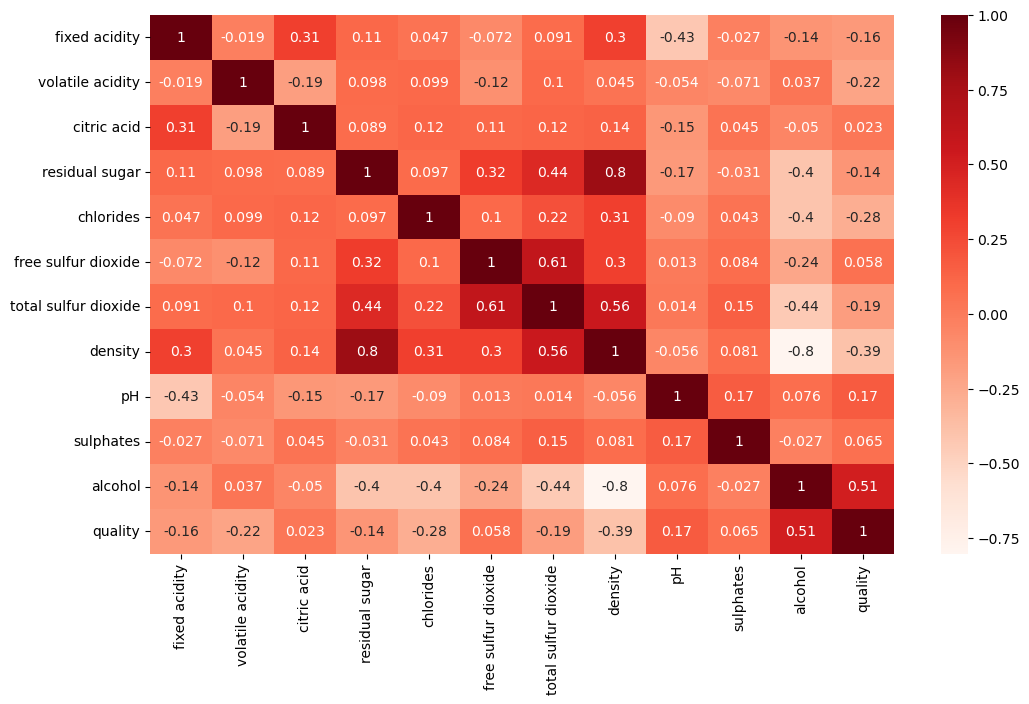

In [4]:
plt.figure(figsize=(12,7))
sns.heatmap(vino_train.corr(),annot=True,cmap='Reds')
plt.show()

Из тепловой карты с корреляциями можно заметить, что свободный диоксид серы связан с общим диоксидом серы (правда из навзания колонок можно было такой вывод сделать), свободный входит в общий. Пока не ясно, что делать с этой информацией, может быть потом придумаю. Про плотность (density) будет ниже

In [6]:
vino_train = vino_train.drop('density', axis = 1)

Было принято решение удалить из тренировочного набора колонку с плотностью (density), так как если мы посмотрим на mean и std, то увидим, что среднее значение плотности почти одинаковое при разных оценках качества, а отклонение слишком мало. Можем сделать вывод, что эта колонка просто не влияет на качество вина.

Дубликаты тоже прочь, а то... Ну там в общем тоже не круто получится)

In [7]:
vino_train = vino_train.drop_duplicates()

## Поехали!

Наша цель: научиться приобретать вино качеством от 7 и более (7, 8 и т.д.)

In [8]:
print('Значения quality',vino_train['quality'].unique())

Значения quality [7 5 3 4 6 8 9]


Следовательно нам не важно какая там будет именно оценка у нашего "крутого" 7, 8 и 9. Пэтому мы всё наше "крутое" вино сделаем 1 (целивым классом), а остальное 0.

In [9]:
X = vino_train.drop('quality',axis = 1)
y = vino_train['quality']

y = y.apply(lambda y_value : 1 if y_value >= 7 else 0)

print(X.shape)
print(y.shape)

(1725, 10)
(1725,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

Вот, сейчас пора бы и метрику выбрать...

### Мы хотим  precision

Что это вообще такое: "Данная метрика покажет насколько точно мы предсказываем класс 1, есть ли у нас мусор в предсказанном классе 1 из класса 0. Ошибки в самом классе 1 нас не интересуют."
$$ precision = \frac{TP}{TP+FP}$$

|                     | y_pred = 0 | y_pred = 1          |
| ----------- |:------------:| ---------------:|
| y_true = 0       | True Negative (**TN**)     | <span style="color:red">False Positive (**FP**)</span> |
| y_true = 1       | False Negative (**FN**)    | <span style="color:red">True Positive (**TP**)</span>  |

То есть, так как наша цель приобретать вино качеством 7 и выше, то нам нужно, чтобы в нашей корзине было только "крутое" вино и минимум не крутого, мы даже будем готовы не купить какое-то "крутое" вино, лишь бы не ошибиться и не взять плохое...

Сейчас будем смотреть все доступные нам алгоритмы

### Ближайшие соседи

Тут вроде с параметарми всё понятно, их не то чтобы много, особо не наменяешь(

In [11]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])

scalers = [MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()]
n_neighbors = range(1, 100, 2)
p = range(1, 15, 2)
weights = ['uniform', 'distance']

param_grid =[
    {'preprocessing': scalers, 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)

grid_kn = GridSearchCV(pipe, param_grid, cv = cv, scoring = 'precision', return_train_score = True, n_jobs = -1)
grid_kn.fit(X_train, y_train)
grid_kn

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [KNeighborsClassifier(n_neighbors=99,
                                                              p=13,
                                                              weights='distance')],
                          'classifier__n_neighbors': range(1, 100, 2),
                          'classifier__p': range(1, 15, 2),
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True, scoring='precision')

In [12]:
grid_result = pd.DataFrame(grid_kn.cv_results_).sort_values(['rank_test_score','std_test_score']).T
grid_result

,2796,2716,2788,2740,2732,2148,2736,2092,2380,2436,...,39,51,55,19,23,3,7,11,15,67
mean_fit_time,0.002793,0.002992,0.003192,0.002793,0.002792,0.002792,0.004987,0.003391,0.002793,0.002792,...,0.002792,0.002793,0.008178,0.002792,0.002593,0.003391,0.002992,0.007779,0.002593,0.002793
std_fit_time,0.000399,0.0,0.000399,0.000399,0.000399,0.000399,0.004039,0.000488,0.000399,0.000399,...,0.000399,0.000399,0.006893,0.000399,0.000489,0.000488,0.0,0.009574,0.000489,0.000399
mean_score_time,0.058045,0.08996,0.062233,0.057047,0.077194,0.063829,0.077194,0.089666,0.071409,0.05984,...,0.011769,0.021542,0.008976,0.020146,0.009175,0.008377,0.002992,0.016755,0.011968,0.023138
std_score_time,0.002849,0.009301,0.001493,0.001595,0.00587,0.01305,0.007372,0.012592,0.009784,0.009566,...,0.006128,0.008406,0.000631,0.007838,0.000399,0.000488,0.0,0.004108,0.005007,0.012871
param_classifier,"KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...",...,"KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei...","KNeighborsClassifier(n_neighbors=99, p=13, wei..."
param_classifier__n_neighbors,99,97,99,97,97,77,97,75,85,87,...,1,1,1,1,1,1,1,1,1,3
param_classifier__p,13,7,11,13,11,5,13,5,7,7,...,9,13,13,5,5,1,1,3,3,3
param_classifier__weights,distance,distance,distance,distance,distance,distance,uniform,distance,distance,distance,...,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...


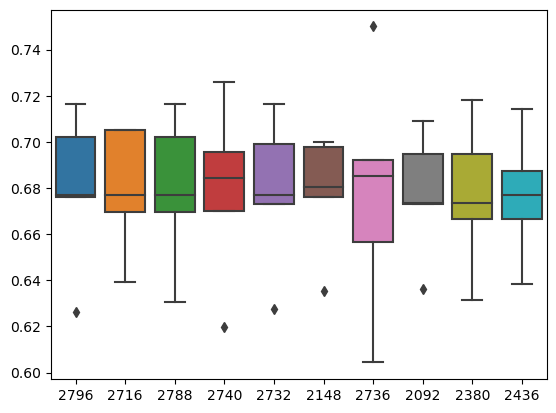

In [13]:
mask = grid_result.index[grid_result.index.str.endswith('_test_score')][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl);

In [14]:
grid_kn.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=99, p=13, weights='distance'),
 'classifier__n_neighbors': 99,
 'classifier__p': 13,
 'classifier__weights': 'distance',
 'preprocessing': MinMaxScaler()}

In [18]:
pipe_best_kn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors = 99, p = 13, weights = 'distance'))
pipe_best_kn.fit(X_train,y_train)

y_pred_best = pipe_best_kn.predict(X_test)

print('Лучшая модель: Точность на тестовом наборе:',precision_score(y_test, y_pred_best))

Лучшая модель: Точность на тестовом наборе: 0.6607142857142857


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       443
           1       0.66      0.60      0.63       247

    accuracy                           0.75       690
   macro avg       0.72      0.71      0.72       690
weighted avg       0.74      0.75      0.74       690



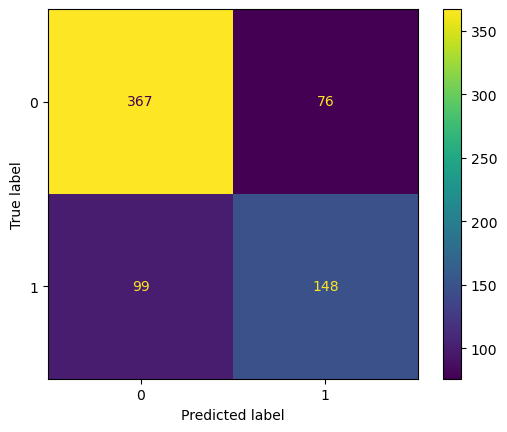

In [19]:
matrix = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(matrix).plot();
print(classification_report(y_test, y_pred_best))

#### Вывод:

Как-то слабенько получилось...

### Наивный байес

"Наивный Байес – это самый простой алгоритм, который вы можете применить к своим данным. Как следует из названия, этот алгоритм делает предположение, что все переменные в наборе данных "наивные", т.е. не коррелируют друг с другом."

Так как мы видели тепловую карту с корреляциями, то можно сразу предположить, что хорошего результата наивный байес нам не предложит((

In [20]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])

scalers = [MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()]

param_grid =[
    {
        'preprocessing': scalers,
        'classifier': [GaussianNB()]
    }
]

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)

grid_nb = GridSearchCV(pipe, param_grid, cv = cv, scoring = 'precision', return_train_score = True, n_jobs = -1)
grid_nb.fit(X_train, y_train)
grid_nb

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True, scoring='precision')

In [21]:
grid_result = pd.DataFrame(grid_nb.cv_results_).sort_values(['rank_test_score','std_test_score']).T
grid_result

,0,1,2,3
mean_fit_time,0.003391,0.002992,0.004388,0.002593
std_fit_time,0.000488,0.000001,0.000798,0.000489
mean_score_time,0.002393,0.002992,0.002194,0.001795
std_score_time,0.000798,0.001995,0.000399,0.000399
param_classifier,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'classifier': GaussianNB(), 'preprocessing': ...","{'classifier': GaussianNB(), 'preprocessing': ...","{'classifier': GaussianNB(), 'preprocessing': ...","{'classifier': GaussianNB(), 'preprocessing': ..."
split0_test_score,0.553571,0.553571,0.553571,0.391489
split1_test_score,0.538462,0.538462,0.538462,0.478261
split2_test_score,0.605096,0.605096,0.605096,0.477387


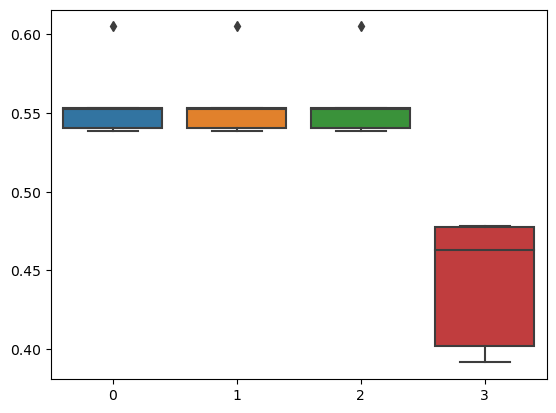

In [22]:
mask = grid_result.index[grid_result.index.str.endswith('_test_score')][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl);

In [23]:
grid_kn.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=99, p=13, weights='distance'),
 'classifier__n_neighbors': 99,
 'classifier__p': 13,
 'classifier__weights': 'distance',
 'preprocessing': MinMaxScaler()}

In [24]:
pipe_best_nb = make_pipeline(MinMaxScaler(), GaussianNB())
pipe_best_nb.fit(X_train,y_train)

y_pred_best = pipe_best_nb.predict(X_test)

print('Лучшая модель: Точность на тестовом наборе:',precision_score(y_test, y_pred_best))

Лучшая модель: Точность на тестовом наборе: 0.5644699140401146


              precision    recall  f1-score   support

           0       0.85      0.66      0.74       443
           1       0.56      0.80      0.66       247

    accuracy                           0.71       690
   macro avg       0.71      0.73      0.70       690
weighted avg       0.75      0.71      0.71       690



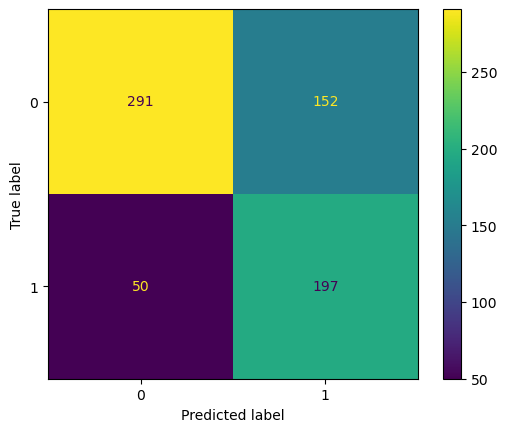

In [25]:
matrix = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(matrix).plot();
print(classification_report(y_test, y_pred_best))

#### Вывод:

Какой-то уж слишком наивный этот ваш байес

### Логистическая регрессия

Тут выяснилось, что существует интересный параметр C, что это за штука и для чего в блоке ниже

Параметр C в логистической регрессии Sklearn является гиперпараметром, который контролирует силу регуляризации алгоритма. В логистической регрессии регуляризация используется для предотвращения переподготовки, которая происходит, когда модель слишком сложна и слишком хорошо вписывается в тренировочные данные, что приводит к плохому обобщению на новые данные.

Параметр C является обратным к силе регуляризации. Меньшее значение C приводит к более сильной регуляризации, что означает, что модель будет менее сложной и более обобщаемой. С другой стороны, большее значение C приводит к более слабой регуляризации, что означает, что модель будет более сложной и менее обобщаемой.

In [26]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('classifier', KNeighborsClassifier())])
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()]
iterr = range(1, 1000, 50)
C = [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = [
    {
        'preprocessing': scalers,
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l1'],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__max_iter' : iterr,
        'classifier__C' : C
    },
    {
        'preprocessing': scalers,
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'classifier__max_iter' : iterr,
        'classifier__C' : C
    },
    {
        'preprocessing': scalers,
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['none'],
        'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'classifier__max_iter' : iterr,
        'classifier__C' : C
    }
]

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)

grid_lr = GridSearchCV(pipe, param_grid, cv = cv, scoring = 'precision', return_train_score = True, n_jobs = -1)
grid_lr.fit(X_train, y_train)
grid_lr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__max_iter': range(1, 1000, 50),
                          'classifier__p...
                                            RobustScaler(), Normalizer()]},
                         {'classifier': [LogisticRegression()],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__max_iter': range(1, 1000, 50),
                          'classifier__penalty': ['none'],
                          'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                  

In [27]:
grid_result = pd.DataFrame(grid_lr.cv_results_).sort_values(['rank_test_score','std_test_score']).T
grid_result

,977,1772,1776,165,1373,1780,1784,1792,1796,1800,...,4324,4327,4640,4643,4644,4647,4960,4963,4964,4967
mean_fit_time,0.008577,0.002793,0.002593,0.002992,0.002793,0.005984,0.004588,0.003591,0.003989,0.006183,...,0.002793,0.003192,0.003191,0.002992,0.003392,0.00399,0.003191,0.003191,0.003391,0.003989
std_fit_time,0.011675,0.000399,0.000489,0.000001,0.000399,0.000631,0.000488,0.000489,0.0,0.000977,...,0.000746,0.000398,0.000399,0.000001,0.000489,0.000892,0.000399,0.000398,0.000488,0.001545
mean_score_time,0.001796,0.001396,0.001795,0.001596,0.001595,0.001396,0.001995,0.001595,0.001596,0.001795,...,0.001994,0.001197,0.002394,0.001595,0.001396,0.005784,0.002195,0.001795,0.001796,0.001794
std_score_time,0.000399,0.000489,0.000746,0.000488,0.000489,0.000489,0.000631,0.000489,0.000489,0.000399,...,0.000001,0.000399,0.000488,0.000488,0.000489,0.009083,0.000399,0.000399,0.000398,0.000398
param_classifier,"LogisticRegression(C=0.001, max_iter=1, solver...","LogisticRegression(C=0.001, max_iter=1, solver...","LogisticRegression(C=0.001, max_iter=1, solver...",LogisticRegression(),"LogisticRegression(C=0.001, max_iter=1, solver...","LogisticRegression(C=0.001, max_iter=1, solver...","LogisticRegression(C=0.001, max_iter=1, solver...","LogisticRegression(C=0.001, max_iter=1, solver...","LogisticRegression(C=0.001, max_iter=1, solver...","LogisticRegression(C=0.001, max_iter=1, solver...",...,LogisticRegression(),LogisticRegression(),LogisticRegression(),LogisticRegression(),LogisticRegression(),LogisticRegression(),LogisticRegression(),LogisticRegression(),LogisticRegression(),LogisticRegression()
param_classifier__C,0.001,0.1,0.1,0.01,0.01,0.1,0.1,0.1,0.1,0.1,...,1,1,10,10,10,10,100,100,100,100
param_classifier__max_iter,1,1,1,1,1,51,51,51,51,101,...,1,1,1,1,1,1,1,1,1,1
param_classifier__penalty,l2,l2,l2,l1,l2,l2,l2,l2,l2,l2,...,none,none,none,none,none,none,none,none,none,none
param_classifier__solver,saga,sag,saga,saga,sag,newton-cg,lbfgs,sag,saga,newton-cg,...,lbfgs,lbfgs,newton-cg,newton-cg,lbfgs,lbfgs,newton-cg,newton-cg,lbfgs,lbfgs
param_preprocessing,StandardScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),...,MinMaxScaler(),Normalizer(),MinMaxScaler(),Normalizer(),MinMaxScaler(),Normalizer(),MinMaxScaler(),Normalizer(),MinMaxScaler(),Normalizer()


<AxesSubplot:>

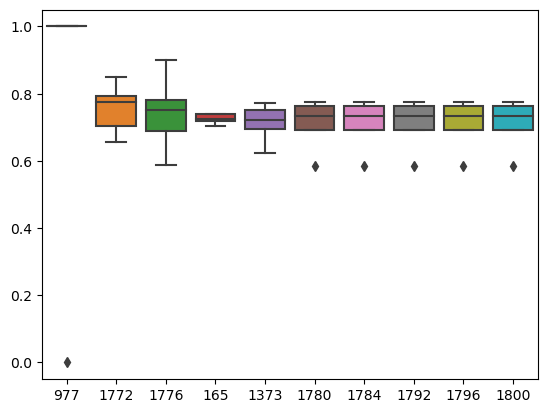

In [28]:
mask = grid_result.index[grid_result.index.str.endswith('_test_score')][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data = tabl)

In [29]:
grid_lr.best_params_

{'classifier': LogisticRegression(C=0.001, max_iter=1, solver='saga'),
 'classifier__C': 0.001,
 'classifier__max_iter': 1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga',
 'preprocessing': StandardScaler()}

In [39]:
pipe_best_lr = make_pipeline(StandardScaler(), LogisticRegression(solver = 'saga', penalty = 'l2', C = 0.001))
pipe_best_lr.fit(X_train,y_train)

y_pred_best = pipe_best_lr.predict(X_test)

print('Лучшая модель: Точность на тестовом наборе:',precision_score(y_test, y_pred_best))

Лучшая модель: Точность на тестовом наборе: 0.8888888888888888


              precision    recall  f1-score   support

           0       0.65      1.00      0.79       221
           1       0.89      0.06      0.12       124

    accuracy                           0.66       345
   macro avg       0.77      0.53      0.46       345
weighted avg       0.74      0.66      0.55       345



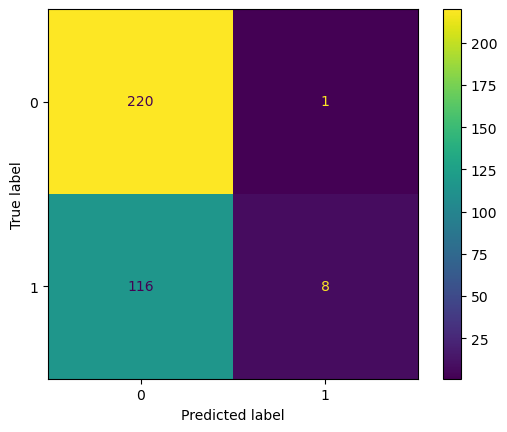

In [40]:
matrix = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(matrix).plot();
print(classification_report(y_test, y_pred_best))

#### Вывод:

Выглядит круто! Берём!